# Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import resample

# Chargement des données

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 3. Nettoyage et typage

1. Valeurs manquantes

In [5]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

2. Info DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


3. Statistiques descriptives

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 4. Analyse Exploratoire (EDA)

1. Distribution des variables

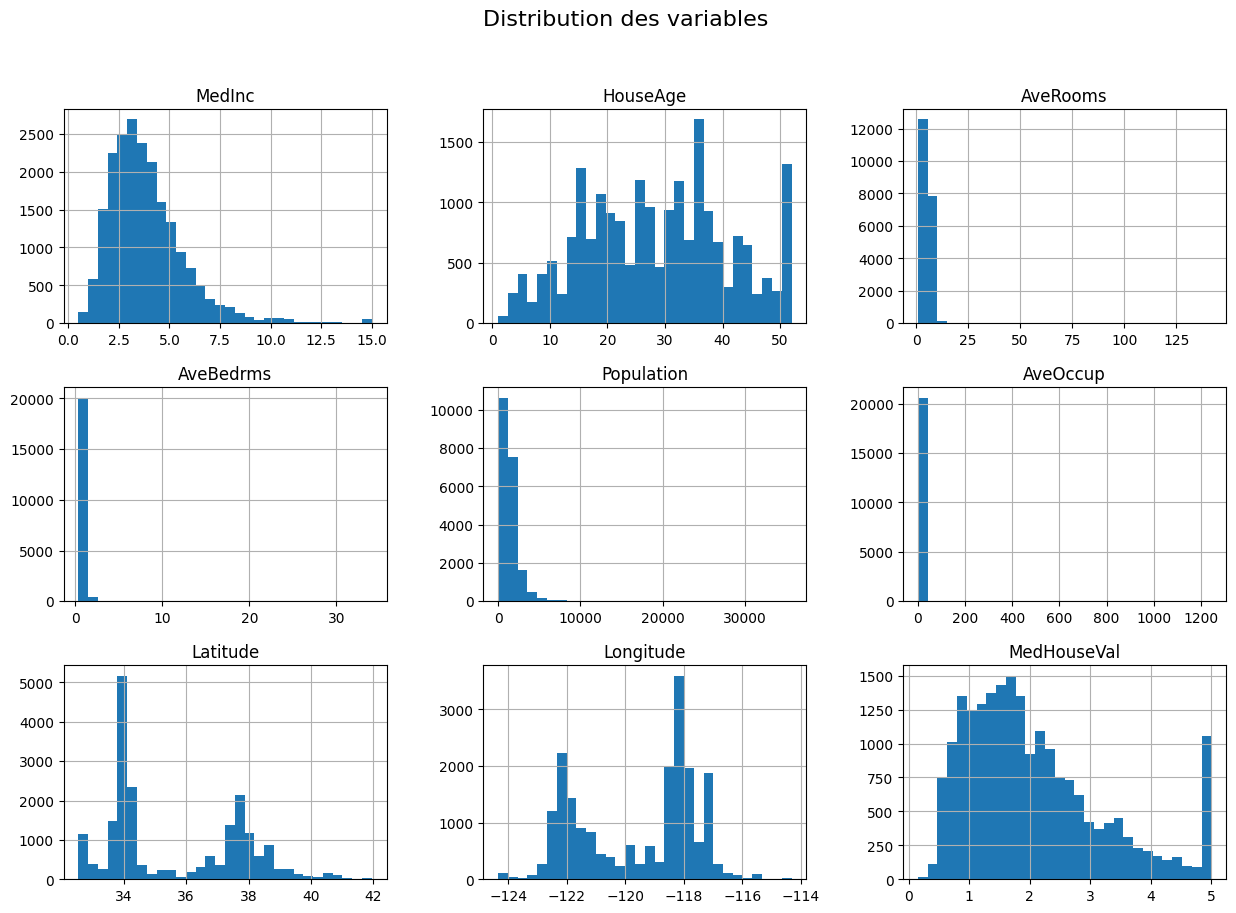

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution des variables", fontsize=16)
plt.show()

2. Matrice de correlation

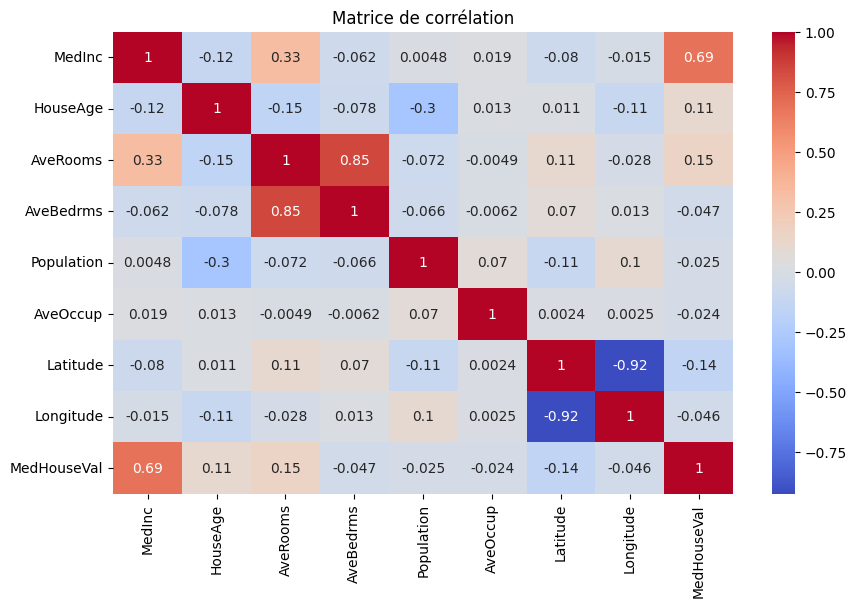

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

3. Revenu médian vs Valeur médiane des maisons 

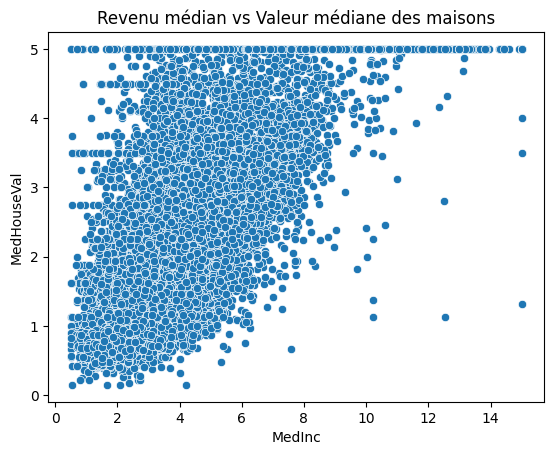

In [11]:
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title("Revenu médian vs Valeur médiane des maisons")
plt.show()

# Split Train/Val/Test

In [12]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 6. Feature Engineering

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 7. Modèle de base - Régression Linéaire

In [14]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_val_pred = lr.predict(X_val_scaled)

print("\n Régression Linéaire (Validation) :")
print("MSE:", mean_squared_error(y_val, y_val_pred))
print("MAE:", mean_absolute_error(y_val, y_val_pred))
print("R²:", r2_score(y_val, y_val_pred))


 Régression Linéaire (Validation) :
MSE: 0.5325643962848101
MAE: 0.5336164161743362
R²: 0.5920099290350325


# 8. Ridge et Lasso

In [15]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_val_ridge = ridge.predict(X_val_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_val_lasso = lasso.predict(X_val_scaled)

print("\n Ridge (Validation) :")
print("MSE:", mean_squared_error(y_val, y_val_ridge))
print("MAE:", mean_absolute_error(y_val, y_val_ridge))
print("R²:", r2_score(y_val, y_val_ridge))

print("\n Lasso (Validation) :")
print("MSE:", mean_squared_error(y_val, y_val_lasso))
print("MAE:", mean_absolute_error(y_val, y_val_lasso))
print("R²:", r2_score(y_val, y_val_lasso))


 Ridge (Validation) :
MSE: 0.5325535024349087
MAE: 0.5336095384717136
R²: 0.5920182746597593

 Lasso (Validation) :
MSE: 0.6824109443453313
MAE: 0.6243701844376794
R²: 0.4772146024913244


# 9. Évaluation finale sur le test set (modèle Ridge par exemple)

In [16]:
best_model = ridge
y_test_pred = best_model.predict(X_test_scaled)

print("\n Évaluation finale (Test set) :")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))

# Intervalle de confiance simple (bootstrap)
errors = y_test - y_test_pred
bootstrapped_stds = [resample(errors, replace=True).std() for _ in range(1000)]
ci_low = np.percentile(bootstrapped_stds, 2.5)
ci_high = np.percentile(bootstrapped_stds, 97.5)
print(f"95% IC sur l'écart-type des erreurs : [{ci_low:.3f}, {ci_high:.3f}]")


 Évaluation finale (Test set) :
MSE: 0.5545733931004739
MAE: 0.5337479409939057
R²: 0.5955342565680284
95% IC sur l'écart-type des erreurs : [0.708, 0.797]


# 10. Interprétation des coefficients

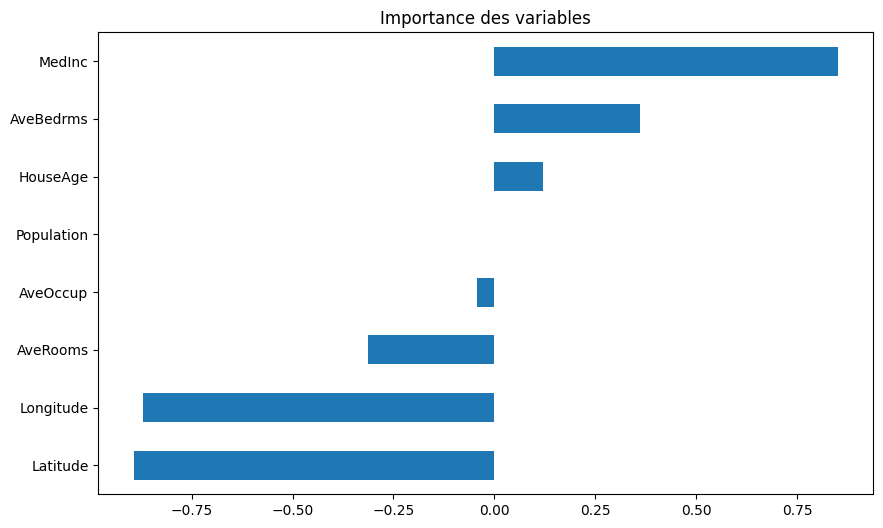

In [17]:
coeffs = pd.Series(best_model.coef_, index=X.columns)
coeffs.sort_values().plot(kind='barh', figsize=(10, 6), title="Importance des variables")
plt.show()